# Prove di esercizio

## Importo le librerie e i file necessari

In [217]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

#volendo posso importare delle distribuzioi già fatte da scipy.stats
import scipy.stats as stats

## Inizio analisi del dataset (importazione e modifica iniziale)

In [218]:
DATASET_PATH = "./data/loan-prediction/dataset.csv"

In [219]:
#carico il dataset con Pandas
#prima mi conviene aprire il dataset per vedere come è separato (si può vedere anche solo dall'estensione del file se csv è comma separated values )
data = pd.read_csv(DATASET_PATH)



#Per questioni di analisi mi stampo le dimensioni del dataset 
print('Dataset dimension: {}'.format(data.shape))
#la format mi permette di inserire il risultato dentro le parentesi graffe 
data.head()
#ricodo che head stampa le prime n righe di un dataset (default 5)

Dataset dimension: (614, 13)


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


> In questo caso si nota che l'indice è già settato correttamente (già presente nel dataset)

Uso data.describe per avere una descrizione di tutte le variabili del mio dataset, me ne ritorna la quantità, la media ecc

In [220]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


<font color = Red> ATTENZIONE </font> La tabella sopra mi riporta solo i dati numerici, per avere una migliore descrizione è meglio usare:

In [221]:
data.describe(include='all')

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,614,601,611,599,614,582,614.000000,614.000000,592.000000,600.00000,564.000000,614,614
unique,614,2,2,4,2,2,NaN,NaN,NaN,NaN,NaN,3,2
top,LP001002,Male,Yes,0,Graduate,No,NaN,NaN,NaN,NaN,NaN,Semiurban,Y
freq,1,489,398,345,480,500,NaN,NaN,NaN,NaN,NaN,233,422
mean,NaN,NaN,NaN,NaN,NaN,NaN,5403.459283,1621.245798,146.412162,342.00000,0.842199,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,6109.041673,2926.248369,85.587325,65.12041,0.364878,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,150.000000,0.000000,9.000000,12.00000,0.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,2877.500000,0.000000,100.000000,360.00000,1.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,3812.500000,1188.500000,128.000000,360.00000,1.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,5795.000000,2297.250000,168.000000,360.00000,1.000000,NaN,NaN


> Qua seppure non si può fare la media di valori non numerici (= NaN) posso vedere quani sono e se ci sono ripetizioni 

Dal describe all noto che LoanID è effettivamente unica (614 con unique 614) posso quindi caricarla impostando quell'indice  

In [222]:
data = pd.read_csv(DATASET_PATH, index_col="Loan_ID")
print("Il mio dataset ha dimensione: {}".format(data.shape))
data.head()

Il mio dataset ha dimensione: (614, 12)


,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Loan_ID,,,,,,,,,,,,
LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


### Controllo se ci sono NaN Values

In [223]:
print("Ci sono NaN Values: {}".
    format(data.isnull().any().any()
    ))

Ci sono NaN Values: True


> Uso il doppio any perchè il primo controlla tutte le righe e il secondo controlla i vettori di .any creato dal primo 

In [224]:
data.apply(lambda x:sum(x.isnull()))

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

***


## Analisi dei dati

In [225]:
# Create a lambda function which will be applied to each entry
# of the numpy 2-D array of AxesSubplot objects
# x is a reference to an AxesSubplot object
y_labeler = lambda x: x.set_ylabel('density')

# np.vectorize() allows calling the function on each element
y_labeler = np.vectorize(y_labeler)

>Salto la distribution con i displot

### Boxplot analisys 

/Users/luca/opt/miniconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/luca/opt/miniconda3/lib/python3.9/site-packages/seaborn/_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
/Users/luca/opt/miniconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/luca/opt/miniconda3/lib/python3.9/site-packages/seaborn/_core.py:1326: UserWarning: Vertical orientation ignored with 

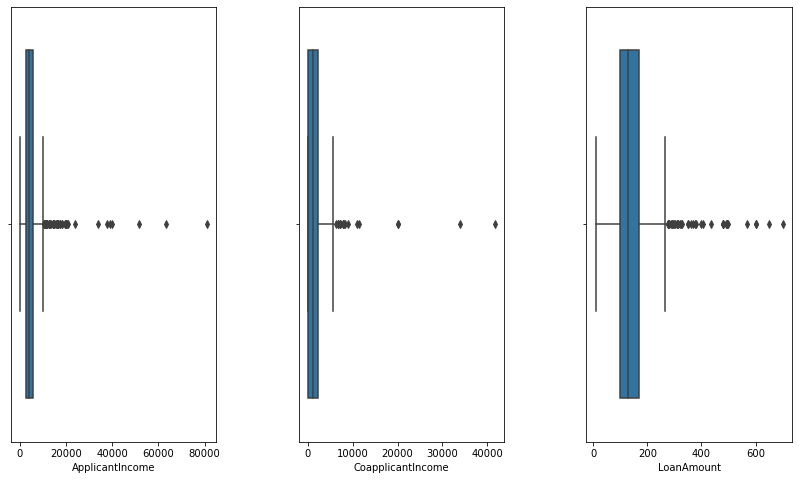

In [226]:
#voglio un sublot con 1 riga e 3 colonne 
fig , axes = plt.subplots(1,3, figsize=(14,8))

sns.boxplot(data.ApplicantIncome, ax=axes[0], orient ='v')
sns.boxplot(data.CoapplicantIncome, ax= axes[1], orient='v')
sns.boxplot(data.loc[data.LoanAmount.notnull(), 'LoanAmount'], ax=axes[2], orient='v')
plt.subplots_adjust(hspace=.33, wspace=.4)

> Dall' analisi dei boxplots vedo che ci sono parecchi outliers in tutte e tre le variabili 

### Analizzo dei boxplot di coppia 


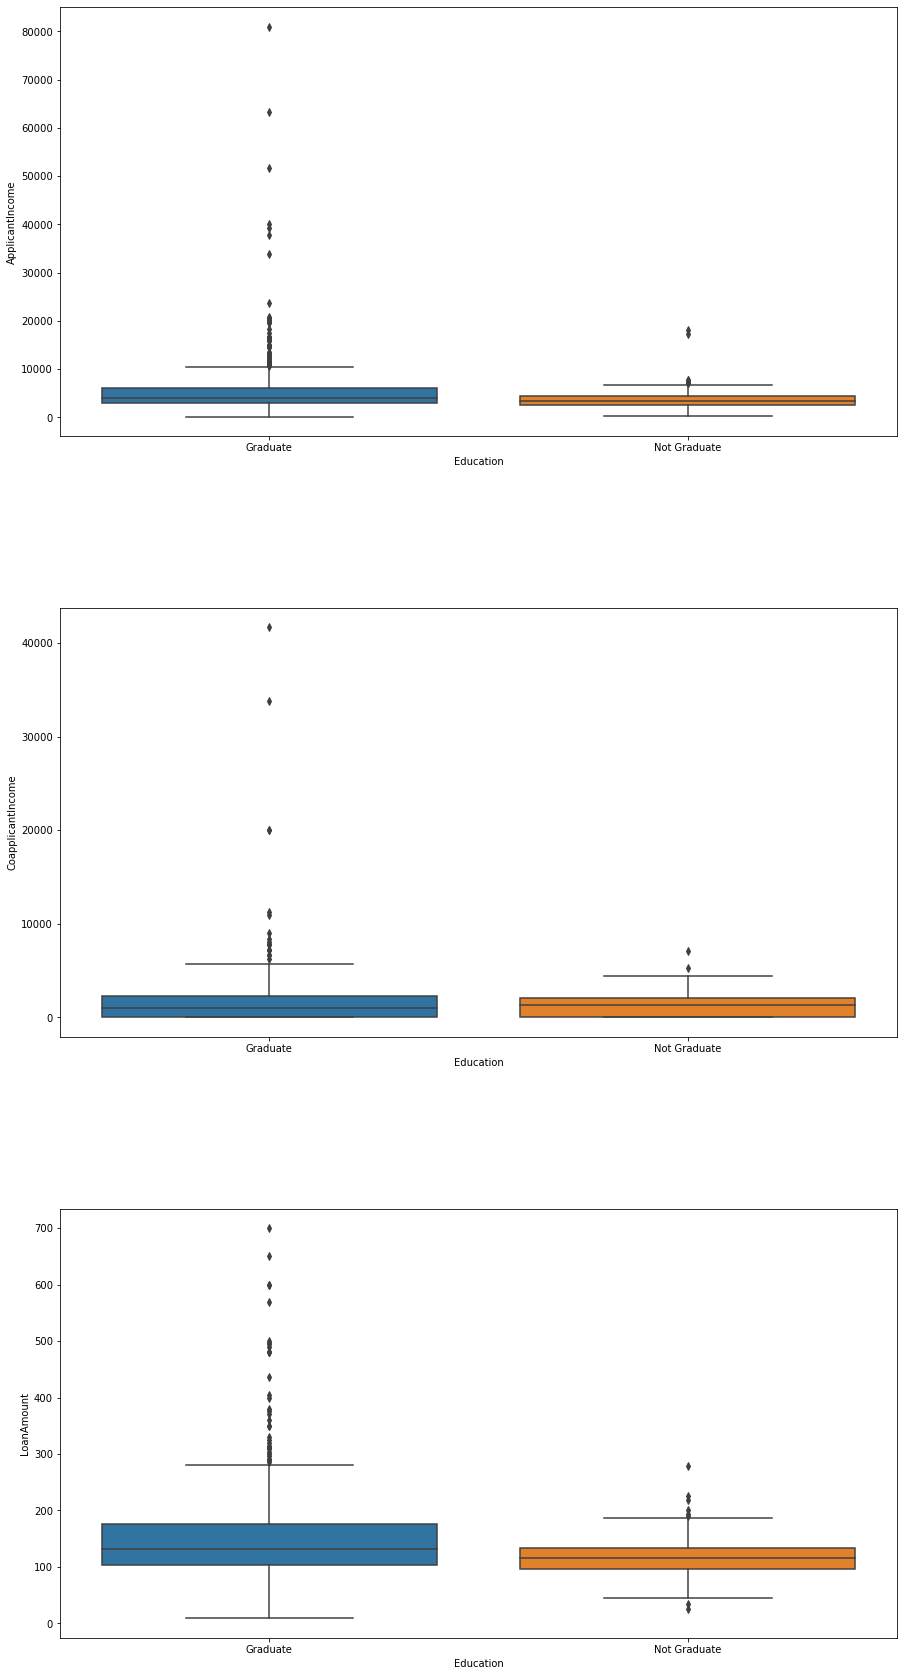

In [227]:
#voglio un sublot con 1 riga e 3 colonne 
fig , axes = plt.subplots(3,1, figsize=(15,30))

sns.boxplot(x=data.Education,y=data.ApplicantIncome, ax=axes[0])
sns.boxplot(x=data.Education,y=data.CoapplicantIncome, ax= axes[1] )
sns.boxplot(x=data.Education, y=data.loc[data.LoanAmount.notnull(), 'LoanAmount'], ax=axes[2])
plt.subplots_adjust(hspace=.4, wspace=.3)

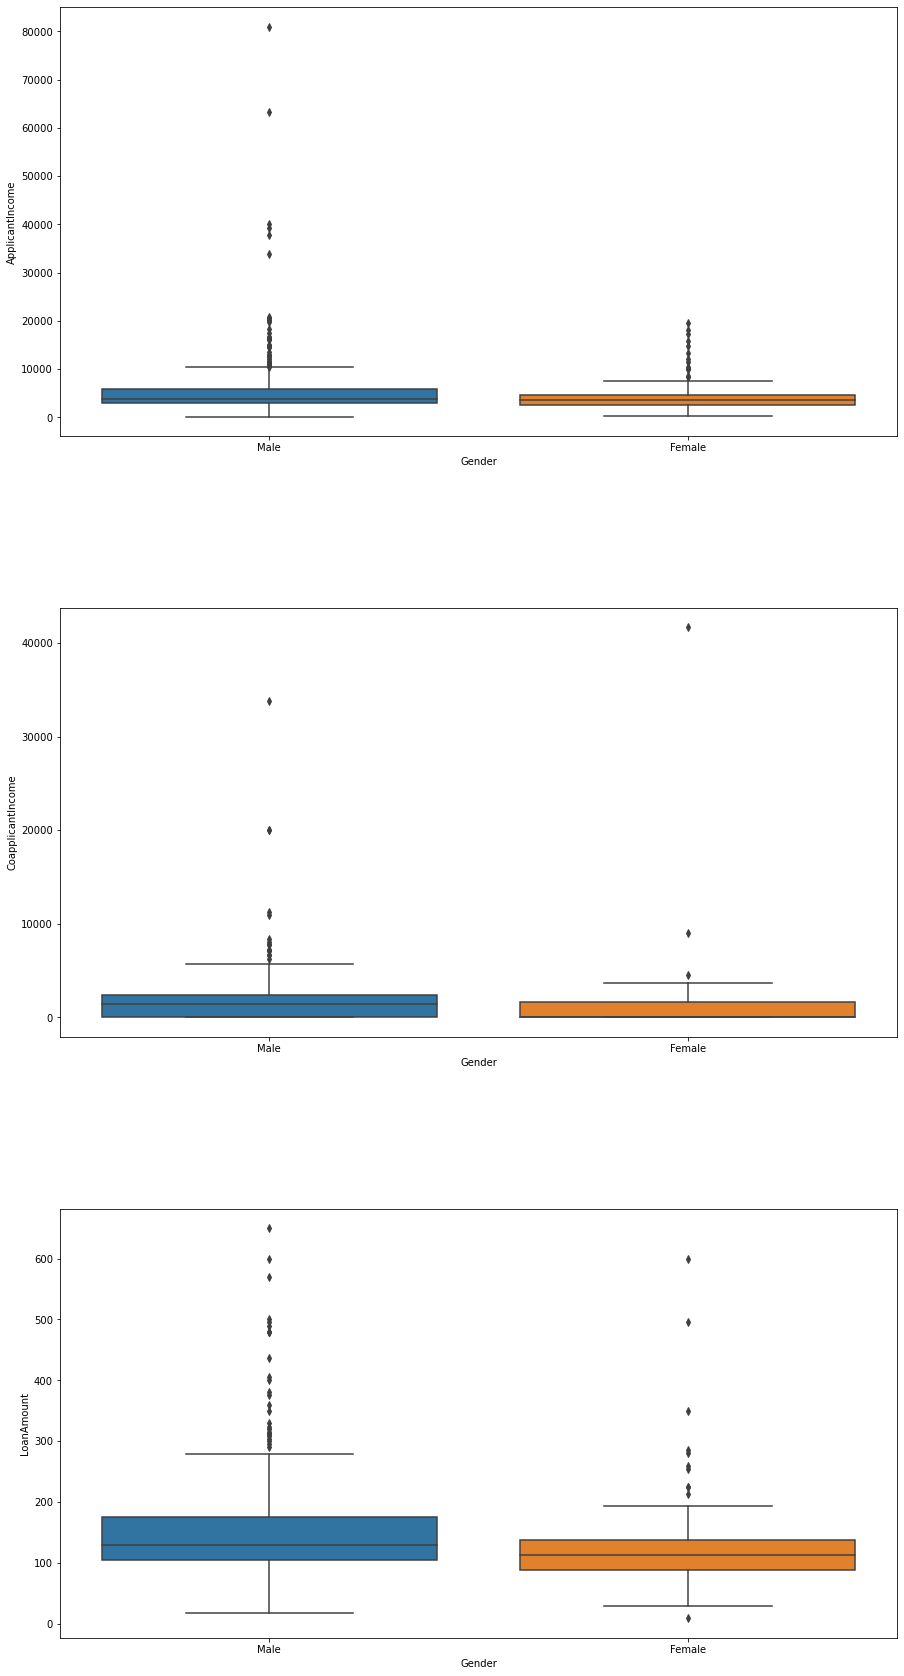

In [228]:
fig , axes = plt.subplots(3,1, figsize=(15,30))

sns.boxplot(x=data.Gender,y=data.ApplicantIncome, ax=axes[0])
sns.boxplot(x=data.Gender,y=data.CoapplicantIncome, ax= axes[1] )
sns.boxplot(x=data.Gender, y=data.loc[data.LoanAmount.notnull(), 'LoanAmount'], ax=axes[2])
plt.subplots_adjust(hspace=.4, wspace=.3)

***

## PairPlot and countPlot analisys

>Salto l'analisi con i pairplot

> Salto analisi con i Count Plot

***

## Processo i dati 

### Il problema 

* Abbiamo osservato prima due problemi:
   1. La presenza di valori nulli NaN
   2. La presnza di Outliers
   
* Inoltre dobbiamo dbbimao considerare come processare in maniera corretta diverse dimensioni di features e come processare attributi continui e caategorici insieme

### 1. Gestire NaN

* Come abbiamo già detto abbiamo features categoriche e features nuemriche 
* Una possibile strategia per risolvere il problema delle NaN è quello di sostituirle con la __media__ se è una variabile numerica o con la __moda__ se è una variabile categorica  
* Il metodo sopraddetto funziona se la variabile numerica non ha outliers, se questo è il caso conviene sostituire i valori NaN con la __mediana__

In [229]:
#ora verifico che la feature sia nuemerica e se è tale la ssttuisco con la media/mediana
from pandas.api.types import is_numeric_dtype

new_data = data.apply(lambda x: x.fillna(x.median())
                        if is_numeric_dtype(x)
                        else x.fillna(x.mode().iloc[0])
                       )

In [230]:
new_data.describe(include='all')

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,614,614,614,614,614,614.000000,614.000000,614.000000,614.000000,614.000000,614,614
unique,2,2,4,2,2,NaN,NaN,NaN,NaN,NaN,3,2
top,Male,Yes,0,Graduate,No,NaN,NaN,NaN,NaN,NaN,Semiurban,Y
freq,502,401,360,480,532,NaN,NaN,NaN,NaN,NaN,233,422
mean,NaN,NaN,NaN,NaN,NaN,5403.459283,1621.245798,145.752443,342.410423,0.855049,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,6109.041673,2926.248369,84.107233,64.428629,0.352339,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,150.000000,0.000000,9.000000,12.000000,0.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,2877.500000,0.000000,100.250000,360.000000,1.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,3812.500000,1188.500000,128.000000,360.000000,1.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,5795.000000,2297.250000,164.750000,360.000000,1.000000,NaN,NaN


In [231]:
data.describe(include='all')

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,601,611,599,614,582,614.000000,614.000000,592.000000,600.00000,564.000000,614,614
unique,2,2,4,2,2,NaN,NaN,NaN,NaN,NaN,3,2
top,Male,Yes,0,Graduate,No,NaN,NaN,NaN,NaN,NaN,Semiurban,Y
freq,489,398,345,480,500,NaN,NaN,NaN,NaN,NaN,233,422
mean,NaN,NaN,NaN,NaN,NaN,5403.459283,1621.245798,146.412162,342.00000,0.842199,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,6109.041673,2926.248369,85.587325,65.12041,0.364878,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,150.000000,0.000000,9.000000,12.00000,0.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,2877.500000,0.000000,100.000000,360.00000,1.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,3812.500000,1188.500000,128.000000,360.00000,1.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,5795.000000,2297.250000,168.000000,360.00000,1.000000,NaN,NaN


In [232]:
print(data[data.isnull().any(axis=1)].head(10))
print(new_data[data.isnull().any(axis=1)].head(10))

          Gender Married Dependents     Education Self_Employed  \
Loan_ID                                                           
LP001002    Male      No          0      Graduate            No   
LP001027    Male     Yes          2      Graduate           NaN   
LP001034    Male      No          1  Not Graduate            No   
LP001041    Male     Yes          0      Graduate           NaN   
LP001050     NaN     Yes          2  Not Graduate            No   
LP001052    Male     Yes          1      Graduate           NaN   
LP001087  Female      No          2      Graduate           NaN   
LP001091    Male     Yes          1      Graduate           NaN   
LP001106    Male     Yes          0      Graduate            No   
LP001109    Male     Yes          0      Graduate            No   

          ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
Loan_ID                                                                      
LP001002             5849              

In [233]:
data = new_data

> per comodità uso new_data al posto di data

### 2. Gestire gli Outliers

* Come abbiamo visto prima ci sono diverse varabile che presentano Outliers
* Esistono diversi modi per eliminare il problema:
        1. Direttamente eliminare gli outliers (__Trimming__ o __Truncation__)
        2. Windsorizzare gli outliers ovvero sostituirli con uno specifico percentile del dato analizzato (e.g., a 90% winsorization would see all data below the 5th percentile set to the 5th percentile, and data above the 95th percentile set to the 95th percentile). 

In [234]:
stats.mstats.winsorize(data.ApplicantIncome, limits=0.05, inplace = True)
stats.mstats.winsorize(data.CoapplicantIncome, limits=0.05, inplace = True)
stats.mstats.winsorize(data.LoanAmount, limits=0.05, inplace = True)

masked_array(data=[128., 128.,  66., 120., 141., 267.,  95., 158., 168.,
                   296.,  70., 109., 200., 114.,  56., 125., 100.,  76.,
                   133., 115., 104., 296., 116., 112., 151., 191., 122.,
                   110.,  56., 120., 201.,  74., 106., 114., 296., 128.,
                   100., 144., 184., 110.,  80.,  56.,  75., 134.,  96.,
                    88.,  56., 144., 120., 144., 100., 120., 112., 134.,
                   286.,  97.,  96., 135., 180., 144., 120.,  99., 165.,
                   128., 116., 258., 126., 296., 125., 136., 172.,  97.,
                    81.,  95., 187., 113., 176., 110., 180., 130., 111.,
                   128., 167., 265.,  56., 136.,  99., 104., 210., 175.,
                   131., 188.,  81., 122.,  56., 128., 137.,  56., 115.,
                   131., 133., 151., 128., 128., 160., 100., 225., 120.,
                   216.,  94., 136., 139., 152., 128., 118., 185., 154.,
                    85., 175., 259., 180.,  56., 13

In [235]:
data.describe(include='all')

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,614,614,614,614,614,614.000000,614.000000,614.000000,614.000000,614.000000,614,614
unique,2,2,4,2,2,NaN,NaN,NaN,NaN,NaN,3,2
top,Male,Yes,0,Graduate,No,NaN,NaN,NaN,NaN,NaN,Semiurban,Y
freq,502,401,360,480,532,NaN,NaN,NaN,NaN,NaN,233,422
mean,NaN,NaN,NaN,NaN,NaN,4913.416938,1389.211596,140.071661,342.410423,0.855049,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,3174.000637,1548.752960,59.518389,64.428629,0.352339,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,1880.000000,0.000000,56.000000,12.000000,0.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,2877.500000,0.000000,100.250000,360.000000,1.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,3812.500000,1188.500000,128.000000,360.000000,1.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,5795.000000,2297.250000,164.750000,360.000000,1.000000,NaN,NaN


/Users/luca/opt/miniconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/luca/opt/miniconda3/lib/python3.9/site-packages/seaborn/_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
/Users/luca/opt/miniconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/luca/opt/miniconda3/lib/python3.9/site-packages/seaborn/_core.py:1326: UserWarning: Vertical orientation ignored with 

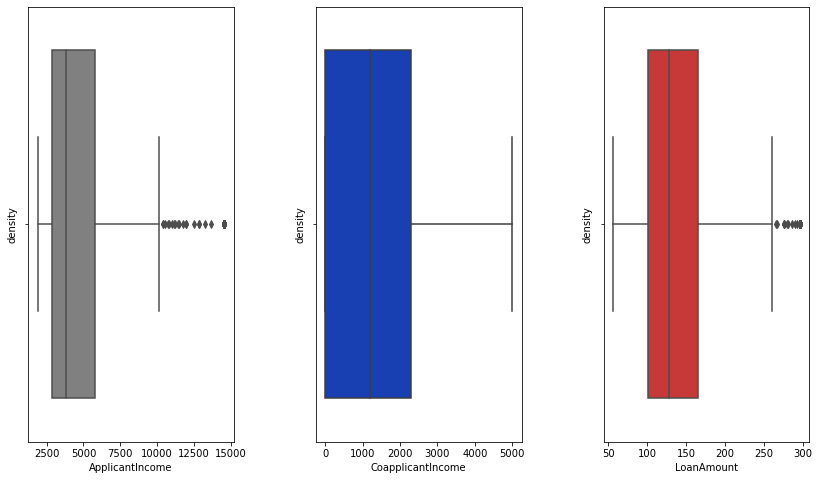

In [236]:
# Create a Figure containing 1x3 subplots
fig, axes = plt.subplots(1, 3, figsize=(14,8))

y_labeler(axes)

sns.boxplot(data.ApplicantIncome, color='#808080', ax=axes[0], orient="v")
sns.boxplot(data.CoapplicantIncome, color='#0033cc', ax=axes[1], orient="v")
sns.boxplot(data.loc[data.LoanAmount.notnull(), 'LoanAmount'], 
                color='#df2020', ax=axes[2], orient="v")
plt.subplots_adjust(wspace=.4, hspace=.3)

> Si può vedere dal plot ho ridotto di molto la quantità degli OL ma ce ne sono ancora parecchi 

Come posso ridurre il numero degli OL?
* una soluzione ora è quella di ridurre o annullare l'effetto  degli outliers applicando una trasformazione logaritmica 

In [237]:
#Apllico la trasformazione esponenziale ad Applicant income e a Loan Amount (quelle con il maggiorn numero di Outliers)
data['Log_ApplicantIncome'] = data.ApplicantIncome.apply(np.log)

#Applico lo stesso a LoanAmount
data['Log_LoanAmount'] = data.LoanAmount.apply(np.log)

data

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Log_ApplicantIncome,Log_LoanAmount
Loan_ID,,,,,,,,,,,,,,
LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y,8.674026,4.852030
LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,8.430109,4.852030
LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,8.006368,4.189655
LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,7.856707,4.787492
LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,8.699515,4.948760
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y,7.972466,4.262680
LP002979,Male,Yes,3+,Graduate,No,4106,0.0,56.0,180.0,1.0,Rural,Y,8.320205,4.025352
LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y,8.996157,5.533389


> Per verificare qua il prof usa dei displot

### 3. Encoding delle features categoriche 


* Le features categoriche devono essere trasformate in numeriche prima di essere date in feed all' algoritmo
* Molti algoritmi in realtà supportano le feature categoriche ma molti altri no, quindi per sicurezza le traformiamo 
*Ci sono due modi per trasformare le features cat in numeriche: il Label Encoding e il One-Hot encoding
*Il primo assegna un numero a ciascuna categoria, il secondo invece trasforma k features categoriche in un vettore binario k dimensionale


ONE-HOT ENCODING

In [238]:
#Usando pandas è molto semplice eseguire la codifica one-hot tramite la funzione get_dummies 
categorical_features=[col for col in data.columns if not is_numeric_dtype(data[col]) and col != 'Loan_Status']
print(categorical_features)
data_with_dummies = pd.get_dummies(data, columns = categorical_features)
data_with_dummies.head()

['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area']


,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Log_ApplicantIncome,Log_LoanAmount,Gender_Female,Gender_Male,...,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
Loan_ID,,,,,,,,,,,,,,,,,,,,,
LP001002,5849,0.0,128.0,360.0,1.0,Y,8.674026,4.852030,0,1,...,0,0,0,1,0,1,0,0,0,1
LP001003,4583,1508.0,128.0,360.0,1.0,N,8.430109,4.852030,0,1,...,1,0,0,1,0,1,0,1,0,0
LP001005,3000,0.0,66.0,360.0,1.0,Y,8.006368,4.189655,0,1,...,0,0,0,1,0,0,1,0,0,1
LP001006,2583,2358.0,120.0,360.0,1.0,Y,7.856707,4.787492,0,1,...,0,0,0,0,1,1,0,0,0,1
LP001008,6000,0.0,141.0,360.0,1.0,Y,8.699515,4.948760,0,1,...,0,0,0,1,0,1,0,0,0,1


Per convenzione sposto la colonna ta trovare come ultima 

In [239]:
columns =data_with_dummies.columns.tolist()
columns.insert(len(columns),columns.pop(columns.index('Loan_Status')))
data_with_dummies=data_with_dummies.loc[:,columns]
data_with_dummies.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Log_ApplicantIncome,Log_LoanAmount,Gender_Female,Gender_Male,Married_No,...,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Loan_Status
Loan_ID,,,,,,,,,,,,,,,,,,,,,
LP001002,5849,0.0,128.0,360.0,1.0,8.674026,4.852030,0,1,1,...,0,0,1,0,1,0,0,0,1,Y
LP001003,4583,1508.0,128.0,360.0,1.0,8.430109,4.852030,0,1,0,...,0,0,1,0,1,0,1,0,0,N
LP001005,3000,0.0,66.0,360.0,1.0,8.006368,4.189655,0,1,0,...,0,0,1,0,0,1,0,0,1,Y
LP001006,2583,2358.0,120.0,360.0,1.0,7.856707,4.787492,0,1,0,...,0,0,0,1,1,0,0,0,1,Y
LP001008,6000,0.0,141.0,360.0,1.0,8.699515,4.948760,0,1,1,...,0,0,1,0,1,0,0,0,1,Y


### 4. Encoding binary class Label

In [240]:
data = data_with_dummies
data.Loan_Status = data.Loan_Status.map(lambda x: 1 if x=='Y' else -1)
data.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Log_ApplicantIncome,Log_LoanAmount,Gender_Female,Gender_Male,Married_No,...,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Loan_Status
Loan_ID,,,,,,,,,,,,,,,,,,,,,
LP001002,5849,0.0,128.0,360.0,1.0,8.674026,4.852030,0,1,1,...,0,0,1,0,1,0,0,0,1,1
LP001003,4583,1508.0,128.0,360.0,1.0,8.430109,4.852030,0,1,0,...,0,0,1,0,1,0,1,0,0,-1
LP001005,3000,0.0,66.0,360.0,1.0,8.006368,4.189655,0,1,0,...,0,0,1,0,0,1,0,0,1,1
LP001006,2583,2358.0,120.0,360.0,1.0,7.856707,4.787492,0,1,0,...,0,0,0,1,1,0,0,0,1,1
LP001008,6000,0.0,141.0,360.0,1.0,8.699515,4.948760,0,1,1,...,0,0,1,0,1,0,0,0,1,1


## Costruzione di un modello predittivo 

In [241]:
from sklearn.metrics import SCORERS
from sklearn.feature_extraction import DictVectorizer as DV
from sklearn import tree
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import explained_variance_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestRegressor
#from sklearn.externals import joblib

#### Splitting del dataset

In [242]:
#voglio escludere la matrice che vuole esserre predetta dallamatrice di analisi 
X=data.iloc[:,:-1]

#separo anche il target vector
y=data.Loan_Status

In [243]:
"""
Let's split our dataset with scikit-learn 'train_test_split' function, 
which splits the input dataset into training and test set, respectively.
We want the training set to account for 80% of the original dataset, whilst 
the test set to account for the remaining 20%.
Additionally, we would like to take advantage of stratified sampling,
so as to obtain the same target distribution in both the training and the test sets.
"""

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=73, 
                                                    stratify=y)

print("Training Set shape: {}".format(X_train.shape))
print("Test Set shape: {}".format(X_test.shape))

Training Set shape: (491, 22)
Test Set shape: (123, 22)


#### Scaling: Perchè e quando


-  <span style="color: red">**REMEMBER:**</span> Not every learning models are sensitive to different feature scales! 

-  For example, in the case of Logistic Regression the vector of model parameters we come up with when we minimize the negative log-likelihood - using gradient descent (iterative) solution - is **not** affected by different feature scales, except for a constant.

-  You can convince yourself of this by computing the gradient of the negative log-likelihood using non-scaled and scaled features.

-  Other models, instead, are not invariant with respect to scalar transformations of the input (features), and leads to completely different results if features are not properly scaled (e.g., Support Vector Machines or SVM). 

#### Scaling:come farlo 

- Lo scaling non può esser fatto prendendo in considerazione tutto il dataset
- Sia quindi se vogliamo standardizzare che normalizzare le nostre features __bisogna__ prendere in considerazione solo il dataset di test
- Poi lo stesso scaling deve essere applicato al test set 

In [244]:
"""
Let's use two different feature scaling strategies: standard z-scores(standardizzazione) and min-max(normalizzazione)
"""
# The following is the scikit-learn package which provides
# various preprocessing capabilities
from sklearn import preprocessing

In [245]:
#standardizzo le features
std_scaler = preprocessing.StandardScaler().fit(X_train)
X_train_std=std_scaler.transform(X_train)

# Normalizing features using min-max
minmax_scaler = preprocessing.MinMaxScaler().fit(X_train)
X_train_minmax = minmax_scaler.transform(X_train)


At this stage, we can work with 3 different feature matrices:
- The original one: X_train
- The standardized one: X_train_std
- The min-max normalized one: X_train_minmax

In the following, however, we work only on the original feature matrix X_train


In [246]:
"""
General function used to assess the quality of predictions
in terms of two scores: accuracy and ROC AUC (Area Under the ROC Curve)
"""
def evaluate(true_values, predicted_values):
    # Classification Accuracy
    print("Accuracy = {:.3f}".
          format(accuracy_score(true_values, predicted_values)))
    # Explained variance score: 1 is perfect prediction
    print("Area Under the ROC Curve (ROC AUC) = {:.3f}".
          format(roc_auc_score(true_values, predicted_values)))

In [247]:
#Creo un oggetto regressore logico
model = LogisticRegression(solver="liblinear")
#provo afare il fit del regressore sul trainig set originale
model.fit(X_train, y_train)

# 2. Assess the quality of predictions made on the same training set
print("***** Evaluate Performance on Training Set *****")
evaluate(y_train, model.predict(X_train))
print()

# 3. Assess the quality of predictions made on the test set
print("***** Evaluate Performance on Test Set *****") 
evaluate(y_test, model.predict(X_test))


***** Evaluate Performance on Training Set *****
Accuracy = 0.817
Area Under the ROC Curve (ROC AUC) = 0.717

***** Evaluate Performance on Test Set *****
Accuracy = 0.813
Area Under the ROC Curve (ROC AUC) = 0.712


In [248]:
print(classification_report(y_test, model.predict(X_test)))

              precision    recall  f1-score   support

          -1       0.89      0.45      0.60        38
           1       0.80      0.98      0.88        85

    accuracy                           0.81       123
   macro avg       0.85      0.71      0.74       123
weighted avg       0.83      0.81      0.79       123



In [249]:
#uso più semplice della cross-validation
model= LogisticRegression(solver="liblinear")
cv = cross_validate(model, X, y, cv=10, scoring=('roc_auc','accuracy'), return_train_score= True)

In [250]:
# Model evaluation using cross-validation
print("***** Evaluate Average Performance on Training Set *****")
print("Avg. Training Set Accuracy = {:.3f}".format(np.mean(cv['train_accuracy'])))
print("Avg. Training Set ROC AUC = {:.3f}".format(np.mean(cv['train_roc_auc'])))
print()
print("***** Evaluate Average Performance on Cross-Validation Set *****")
print("Avg. Test Set Accuracy = {:.3f}".format(np.mean(cv['test_accuracy'])))
print("Avg. Test Set ROC AUC = {:.3f}".format(np.mean(cv['test_roc_auc'])))

***** Evaluate Average Performance on Training Set *****
Avg. Training Set Accuracy = 0.810
Avg. Training Set ROC AUC = 0.800

***** Evaluate Average Performance on Cross-Validation Set *****
Avg. Test Set Accuracy = 0.806
Avg. Test Set ROC AUC = 0.757


In [251]:
# Define an object of type KFold and pass it to the cross_validate function
model = LogisticRegression(solver = "liblinear")

k_fold = KFold(n_splits=10, shuffle=True, random_state=42)

cv = cross_validate(model, X, y, cv=k_fold, scoring=('roc_auc', 'accuracy'), return_train_score=True)
print(cv)

{'fit_time': array([0.00520492, 0.00563288, 0.0051229 , 0.00446105, 0.00500393,
       0.00491476, 0.00533295, 0.00514221, 0.005018  , 0.00586009]), 'score_time': array([0.00340009, 0.00418615, 0.00361705, 0.00321603, 0.00355911,
       0.00343108, 0.00398111, 0.00436473, 0.00328112, 0.00339484]), 'test_roc_auc': array([0.80255517, 0.6845039 , 0.825     , 0.79559364, 0.70144928,
       0.78571429, 0.74686717, 0.7248062 , 0.84404762, 0.75942029]), 'train_roc_auc': array([0.79542908, 0.81216494, 0.79228519, 0.79739808, 0.80811997,
       0.7958777 , 0.80130818, 0.8064477 , 0.79204556, 0.79746664]), 'test_accuracy': array([0.75806452, 0.80645161, 0.79032258, 0.83870968, 0.81967213,
       0.85245902, 0.81967213, 0.75409836, 0.80327869, 0.83606557]), 'train_accuracy': array([0.81521739, 0.80978261, 0.8115942 , 0.80615942, 0.81012658,
       0.80831826, 0.80831826, 0.81555154, 0.80831826, 0.80650995])}


In [252]:
# Model evaluation using cross-validation
print("***** Evaluate Average Performance on Training Set *****")
print("Avg. Training Set Accuracy = {:.3f}".format(np.mean(cv['train_accuracy'])))
print("Avg. Training Set ROC AUC = {:.3f}".format(np.mean(cv['train_roc_auc'])))
print()
print("***** Evaluate Average Performance on Cross-Validation Set *****")
print("Avg. Test Set Accuracy = {:.3f}".format(np.mean(cv['test_accuracy'])))
print("Avg. Test Set ROC AUC = {:.3f}".format(np.mean(cv['test_roc_auc'])))

***** Evaluate Average Performance on Training Set *****
Avg. Training Set Accuracy = 0.810
Avg. Training Set ROC AUC = 0.800

***** Evaluate Average Performance on Cross-Validation Set *****
Avg. Test Set Accuracy = 0.808
Avg. Test Set ROC AUC = 0.767


In [253]:
model = LogisticRegression(solver="liblinear")

K_fold= StratifiedKFold(n_splits=10, shuffle=True, random_state=37)

cv= cross_validate(model,X,y,cv=k_fold,scoring=('roc_auc','accuracy'),return_train_score=True)

print(cv)

{'fit_time': array([0.00703192, 0.00683689, 0.00530577, 0.00541306, 0.00467491,
       0.00555921, 0.00689197, 0.0050571 , 0.00556493, 0.00602221]), 'score_time': array([0.00463796, 0.00453615, 0.00471234, 0.00501513, 0.00466609,
       0.00453711, 0.00491405, 0.003124  , 0.00360274, 0.00303483]), 'test_roc_auc': array([0.80255517, 0.6845039 , 0.825     , 0.79559364, 0.70144928,
       0.78571429, 0.74686717, 0.7248062 , 0.84404762, 0.75942029]), 'train_roc_auc': array([0.79542908, 0.81216494, 0.79228519, 0.79739808, 0.80811997,
       0.7958777 , 0.80130818, 0.8064477 , 0.79204556, 0.79746664]), 'test_accuracy': array([0.75806452, 0.80645161, 0.79032258, 0.83870968, 0.81967213,
       0.85245902, 0.81967213, 0.75409836, 0.80327869, 0.83606557]), 'train_accuracy': array([0.81521739, 0.80978261, 0.8115942 , 0.80615942, 0.81012658,
       0.80831826, 0.80831826, 0.81555154, 0.80831826, 0.80650995])}


#### Selezione delmodello e valutazione 

- Per ora cisiamo concentrati su una istanza molto specifica del modello della Regressione Logistica 
- Non abbiamo quindi provato ad ottimizzare gli __iperparametri__ del nostro modello 
- In pratica abbiamo usato i paramentridi default e non abbiamo quindi effetuato nessuna selezione del modello 
- Il nostro ROC AUC è quindi una stima di generalizzazione delle performance

- La maggior parte delle volte dobbiamo però:
    1. Soffermarci su una "famiglia" di modelli (es Logistic Regression) e fare la selezione degli iperparametri
    2. Scegliere ta un set di modelli (es Logistic Regression,SVM, Decision Tree) ciascuno con set fissato di iperparamentri  (per esempio quelli di default)
    3. Un mix dei precedenti, dove dobbiamo selezionare i migliori iperparametri scegli dal migliore modello tra il set di diversi modelli 

- In ogni caso dobbiamo comunque trovare una generalizzazione della performance del modello scelto 

#### CASO 1: Scegliere i migliori iperparametri da una famiglia fissata di modelli

#### 1.1 Usare il validation Set

In [254]:
models_and_hyperparams = {'LogisticRegression':(LogisticRegression(solver='liblinear'),
                                                    {'C':[0.01, 0.05,0.1,1,2]}
                                                    )
                            }

In [255]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,
                                                    random_state=73,
                                                    stratify=y)
#Ora faccio uno split dei dati già splittati 
X_train_train, X_validation,y_train_train,y_validation = train_test_split(X_train,y_train,test_size=0.2,
                                                    random_state=42,
                                                    stratify=y_train)

In [256]:
#salvo le training score ottenuta da ogni parametro 
training_scores={}
#salvo le validation score ottenuta da ogni parametro 
validation_scores={}

#tengo solo le scores migliori
best_training_score = {}
best_validation_score = {}

# Get the only model available
model = models_and_hyperparams['LogisticRegression'][0]
# Get the hyperparameters for that model
hyperparams = models_and_hyperparams['LogisticRegression'][1]

# Loop through all the hyperparameters
for hp in hyperparams:
    training_scores[hp] = {}
    validation_scores[hp] = {}
    
    # Loop through all the value of a specific hyperparameter
    for val in hyperparams[hp]:
        # set the model's hyperparameter to the current value
        model.set_params(**{hp: val})
        
        # fit the model on the inner training portion 
        model.fit(X_train_train, y_train_train)
        
        # store the inner training score
        training_score = accuracy_score(y_train_train, model.predict(X_train_train))
        training_scores[hp][val] = training_score
        
        # store the inner validation score
        validation_score = accuracy_score(y_validation, model.predict(X_validation))
        validation_scores[hp][val] = validation_score
        
        # Update best training/validation scores
        if not best_training_score:
            best_training_score[hp] = (val, training_score)
        else:
            if best_training_score[hp][1] < training_score:
                best_training_score[hp] = (val, training_score)
                
        if not best_validation_score:
            best_validation_score[hp] = (val, validation_score)
        else:
            if best_validation_score[hp][1] < validation_score:
                best_validation_score[hp] = (val, validation_score)


In [257]:
print("***** Evaluate Performance on Training Set *****")
print(training_scores)
print("***** Evaluate Performance on Validation Set *****")
print(validation_scores)
print("***** Best Accuracy Score on Training Set *****")
print(best_training_score)
print("***** Best Accuracy Score on Validation Set *****")
print(best_validation_score)

***** Evaluate Performance on Training Set *****
{'C': {0.01: 0.6862244897959183, 0.05: 0.7806122448979592, 0.1: 0.8112244897959183, 1: 0.8163265306122449, 2: 0.8163265306122449}}
***** Evaluate Performance on Validation Set *****
{'C': {0.01: 0.6868686868686869, 0.05: 0.7575757575757576, 0.1: 0.7676767676767676, 1: 0.797979797979798, 2: 0.797979797979798}}
***** Best Accuracy Score on Training Set *****
{'C': (1, 0.8163265306122449)}
***** Best Accuracy Score on Validation Set *****
{'C': (1, 0.797979797979798)}


In [258]:
# We set the model's hyperparameters to those leading to the best score on the validation test
best_params = dict([(list(best_validation_score.keys())[0], list(best_validation_score.values())[0][0])])
model.set_params(**best_params)

# We fit this model to the whole training set portion
model.fit(X_train, y_train)
print("***** Evaluate Performance on Training Set *****")
evaluate(y_train, model.predict(X_train))
print("***** Evaluate Performance on Test Set *****")
evaluate(y_test, model.predict(X_test))

***** Evaluate Performance on Training Set *****
Accuracy = 0.817
Area Under the ROC Curve (ROC AUC) = 0.717
***** Evaluate Performance on Test Set *****
Accuracy = 0.813
Area Under the ROC Curve (ROC AUC) = 0.712


#### 1.2.a: Using Cross-Validation (Single Hyperparameter)

In [259]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                    random_state=73, 
                                                    stratify=y)

In [260]:
models_and_hyperparams = {'LogisticRegression': (LogisticRegression(solver = "liblinear"),
                                                 {'C': [0.01, 0.05, 0.1, 0.5, 1, 2]}
                                                )
                         }

In [261]:
k_fold = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Get the only model available
model = models_and_hyperparams['LogisticRegression'][0]

# Get the hyperparameters for that model
hyperparams = models_and_hyperparams['LogisticRegression'][1]

gs = GridSearchCV(estimator=model, param_grid=hyperparams, cv=k_fold, 
                  scoring='accuracy',
                  verbose=True,
                 return_train_score=True)
gs.fit(X_train, y_train)
pd.DataFrame(gs.cv_results_)

Fitting 10 folds for each of 6 candidates, totalling 60 fits


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.004231,0.000815,0.001580,0.000165,0.01,{'C': 0.01},0.68,0.693878,0.693878,0.693878,...,0.687783,0.694570,0.685520,0.690045,0.687783,0.692308,0.690045,0.690045,0.689748,0.002634
1,0.003793,0.000226,0.001481,0.000304,0.05,{'C': 0.05},0.74,0.693878,0.775510,0.795918,...,0.780543,0.769231,0.771493,0.776018,0.780543,0.776018,0.762443,0.769231,0.775063,0.006533
2,0.003828,0.000625,0.001347,0.000154,0.1,{'C': 0.1},0.82,0.734694,0.816327,0.816327,...,0.805430,0.803167,0.798643,0.803167,0.812217,0.812217,0.800905,0.800905,0.805159,0.004920
3,0.004178,0.000228,0.001359,0.000161,0.5,{'C': 0.5},0.80,0.755102,0.816327,0.816327,...,0.812217,0.812217,0.812217,0.816742,0.819005,0.816742,0.809955,0.812217,0.814663,0.004006
4,0.004042,0.000365,0.001323,0.000130,1,{'C': 1},0.82,0.755102,0.816327,0.816327,...,0.814480,0.809955,0.814480,0.814480,0.816742,0.814480,0.807692,0.814480,0.814439,0.003302
5,0.004022,0.000257,0.001446,0.000201,2,{'C': 2},0.82,0.755102,0.816327,0.795918,...,0.814480,0.814480,0.812217,0.816742,0.816742,0.814480,0.807692,0.814480,0.814891,0.003117


In [262]:
print("Best hyperparameter: {}".format(gs.best_params_))
print("Best accuracy score: {:.3f}".format(gs.best_score_))
evaluate(y_test, gs.predict(X_test))

Best hyperparameter: {'C': 0.5}
Best accuracy score: 0.811
Accuracy = 0.813
Area Under the ROC Curve (ROC AUC) = 0.712


#### 1.2.b: Using Cross-Validation (Multiple Hyperparameters)

In [263]:
models_and_hyperparams = {'LogisticRegression': (LogisticRegression(solver = "liblinear"),
                                                 {'C': [0.01, 0.05, 0.1, 0.5, 1, 2],
                                                 'penalty': ['l1', 'l2']}
                                                )
                         }

In [264]:
k_fold = StratifiedKFold(n_splits=10, shuffle=True, random_state=31)

# Get the only model available
model = models_and_hyperparams['LogisticRegression'][0]

# Get the hyperparameters for that model
hyperparams = models_and_hyperparams['LogisticRegression'][1]

gs = GridSearchCV(estimator=model, param_grid=hyperparams, cv=k_fold, 
                  scoring='accuracy',
                  verbose=True,
                 return_train_score=True)
gs.fit(X_train, y_train)
pd.DataFrame(gs.cv_results_)

Fitting 10 folds for each of 12 candidates, totalling 120 fits


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_penalty,params,split0_test_score,split1_test_score,split2_test_score,...,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.003198,0.000977,0.001639,0.000333,0.01,l1,"{'C': 0.01, 'penalty': 'l1'}",0.66,0.673469,0.693878,...,0.690045,0.683258,0.685520,0.685520,0.690045,0.690045,0.690045,0.690045,0.687938,0.002378
1,0.003938,0.000447,0.001442,0.000101,0.01,l2,"{'C': 0.01, 'penalty': 'l2'}",0.68,0.693878,0.693878,...,0.690045,0.690045,0.699095,0.687783,0.687783,0.687783,0.687783,0.690045,0.689975,0.003207
2,0.003024,0.000408,0.001509,0.000288,0.05,l1,"{'C': 0.05, 'penalty': 'l1'}",0.80,0.816327,0.755102,...,0.814480,0.814480,0.814480,0.798643,0.805430,0.807692,0.807692,0.805430,0.808554,0.004757
3,0.004067,0.000307,0.001576,0.000279,0.05,l2,"{'C': 0.05, 'penalty': 'l2'}",0.74,0.775510,0.714286,...,0.785068,0.787330,0.776018,0.766968,0.769231,0.769231,0.773756,0.771493,0.775515,0.006443
4,0.003217,0.000317,0.001407,0.000213,0.1,l1,"{'C': 0.1, 'penalty': 'l1'}",0.80,0.816327,0.755102,...,0.814480,0.814480,0.814480,0.798643,0.805430,0.807692,0.807692,0.805430,0.808554,0.004757
5,0.003766,0.000168,0.001391,0.000126,0.1,l2,"{'C': 0.1, 'penalty': 'l2'}",0.76,0.795918,0.734694,...,0.807692,0.812217,0.816742,0.798643,0.805430,0.800905,0.805430,0.800905,0.806745,0.005426
6,0.004485,0.000638,0.001349,0.000112,0.5,l1,"{'C': 0.5, 'penalty': 'l1'}",0.80,0.816327,0.734694,...,0.821267,0.816742,0.821267,0.807692,0.807692,0.809955,0.809955,0.807692,0.812854,0.005052
7,0.003956,0.000501,0.001321,0.000210,0.5,l2,"{'C': 0.5, 'penalty': 'l2'}",0.80,0.816327,0.755102,...,0.823529,0.819005,0.819005,0.807692,0.807692,0.812217,0.809955,0.812217,0.814212,0.004984
8,0.007839,0.005269,0.001407,0.000167,1,l1,"{'C': 1, 'penalty': 'l1'}",0.80,0.816327,0.734694,...,0.823529,0.816742,0.825792,0.807692,0.805430,0.812217,0.814480,0.809955,0.814664,0.006096
9,0.004368,0.000839,0.001323,0.000132,1,l2,"{'C': 1, 'penalty': 'l2'}",0.80,0.816327,0.755102,...,0.828054,0.819005,0.821267,0.807692,0.809955,0.812217,0.812217,0.812217,0.816023,0.005956


In [265]:
print("Best hyperparameter: {}".format(gs.best_params_))
print("Best accuracy score: {:.3f}".format(gs.best_score_))
evaluate(y_test, gs.predict(X_test))

Best hyperparameter: {'C': 2, 'penalty': 'l2'}
Best accuracy score: 0.811
Accuracy = 0.813
Area Under the ROC Curve (ROC AUC) = 0.712
